In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from tqdm import tqdm
from collections import Counter

In [2]:
import nltk
from wordcloud import WordCloud

In [3]:
# load the dataset
train_source_text_path = "../data/sup_train.en-fr.fr"
train_target_text_path = "../data/sup_train.en-fr.en"
dev_source_text_path = "../data/sup_valid.en-fr.fr"
dev_target_text_path = "../data/sup_valid.en-fr.en"
test_source_text_path = "../data/test.en-fr.fr"
test_target_text_path = "../data/test.en-fr.en"

In [4]:
# read the data from the files and store them in pandas dataframe
def retrieve_data(file_path):
    data = []
    with open(file_path, 'r') as f:
        for line in f.readlines():
            line = line.strip()
            data.append(line)
    return data

In [5]:
train_source_sentences = retrieve_data(train_source_text_path)
train_target_sentences = retrieve_data(train_target_text_path)

In [6]:
train_source_sentences = train_source_sentences[:len(train_source_sentences)//2]
train_target_sentences = train_target_sentences[:len(train_target_sentences)//2]

In [7]:
len(train_source_sentences), len(train_target_sentences)

(783196, 783196)

In [7]:
zipped_train_data = list(zip(train_source_sentences, train_target_sentences))

In [8]:
train_data = pd.DataFrame(zipped_train_data, columns=['source', 'target'])

In [9]:
train_data.head()

,source,target
0,reprise de la session,resumption of the session
1,je déclare reprise la session du parlement eur...,i declare resumed the session of the european ...
2,"comme vous avez pu le constater , le grand "" b...","although , as you will have seen , the dreaded..."
3,vous avez souhaité un débat à ce sujet dans le...,you have requested a debate on this subject in...
4,"en attendant , je souhaiterais , comme un cert...","in the meantime , i should like to observe a m..."


In [10]:
train_data['src_length'] = train_data['source'].map(lambda text: len(text))
train_data.head()

,source,target,src_length
0,reprise de la session,resumption of the session,21
1,je déclare reprise la session du parlement eur...,i declare resumed the session of the european ...,197
2,"comme vous avez pu le constater , le grand "" b...","although , as you will have seen , the dreaded...",227
3,vous avez souhaité un débat à ce sujet dans le...,you have requested a debate on this subject in...,104
4,"en attendant , je souhaiterais , comme un cert...","in the meantime , i should like to observe a m...",253


In [11]:
train_data['target_length'] = train_data['target'].map(lambda text: len(text))
train_data.head()

,source,target,src_length,target_length
0,reprise de la session,resumption of the session,21,25
1,je déclare reprise la session du parlement eur...,i declare resumed the session of the european ...,197,209
2,"comme vous avez pu le constater , le grand "" b...","although , as you will have seen , the dreaded...",227,197
3,vous avez souhaité un débat à ce sujet dans le...,you have requested a debate on this subject in...,104,107
4,"en attendant , je souhaiterais , comme un cert...","in the meantime , i should like to observe a m...",253,239


The average length of a source sentence is: 176.18480942190715
The average length of a target sentence is: 156.829088759391


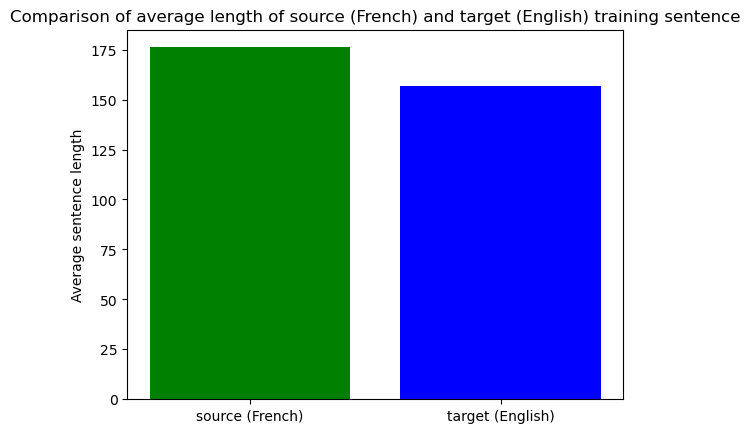

In [13]:
src_text_length = train_data.src_length.values
src_mean_length = np.mean(src_text_length)
print ("The average length of a source sentence is: %s" % (src_mean_length))

target_text_length = train_data.target_length.values
target_mean_length = np.mean(target_text_length)
print ("The average length of a target sentence is: %s" % (target_mean_length))

mean_lens = [src_mean_length, target_mean_length]
# create a dataset
bars = ('source (French)', 'target (English)')
x_pos = np.arange(len(bars))

# Create bars with different colors
plt.bar(x_pos, mean_lens, color=['green', 'blue'])

# Create names on the x-axis
plt.xticks(x_pos, bars)

# plt.xlabel('x% of words as partial translation')
plt.ylabel('Average sentence length')
plt.title("Comparison of average length of source (French) and target (English) training sentence")

# Show graph
plt.show()

In [40]:
# Tokenize the corpus
train_data['source_tokenized'] = train_data['source'].apply(nltk.word_tokenize)

In [45]:
train_data['source_tokenized'].head()

0                           [reprise, de, la, session]
1    [je, déclare, reprise, la, session, du, parlem...
2    [comme, vous, avez, pu, le, constater, ,, le, ...
3    [vous, avez, souhaité, un, débat, à, ce, sujet...
4    [en, attendant, ,, je, souhaiterais, ,, comme,...
Name: source_tokenized, dtype: object

In [12]:
# Count the frequency of each token
fdist = nltk.FreqDist()

for sent in train_data['source']:
    for word in nltk.word_tokenize(sent):
        fdist[word.lower()] += 1

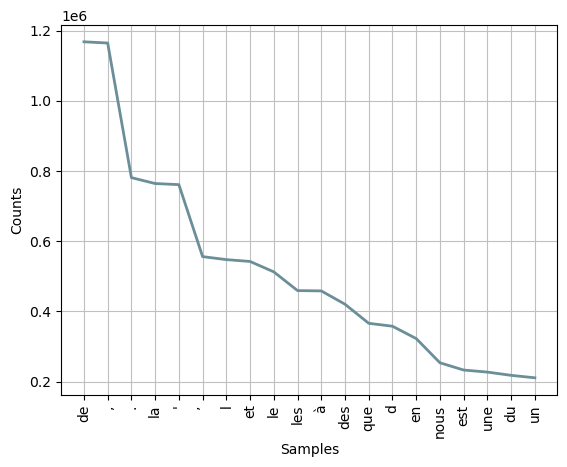

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [27]:
fdist.plot(20, c='#6b8e99')

In [14]:
last_twenty = dict(fdist.most_common()[-20:])

In [15]:
fdist.most_common()[-20:].plot()

{'inter-universités': 1,
 'levitine': 1,
 'khordorkovsky': 1,
 'woody': 1,
 'judoka': 1,
 'foute': 1,
 'antirusse': 1,
 'instaurerons': 1,
 'nazarbayev': 1,
 'ues': 1,
 'fripouille': 1,
 'approvisionnée': 1,
 'tokaji': 1,
 'bolchevique-communiste': 1,
 'hertzen': 1,
 'bukovski': 1,
 'mésentente': 1,
 'théodose': 1,
 'dissidences': 1,
 'modernisatrices': 1}

In [16]:
# Count the frequency of each token
fdist_target = nltk.FreqDist()

for sent in train_data['target']:
    for word in nltk.word_tokenize(sent):
        fdist_target[word.lower()] += 1

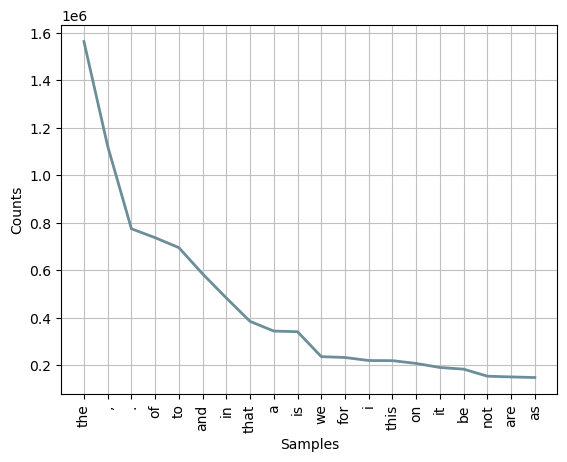

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [28]:
fdist_target.plot(20, c='#6b8e99')

In [17]:
last_twenty_target = dict(fdist_target.most_common()[-20:])

In [18]:
last_twenty_target

{'self-aggrandising': 1,
 'costume': 1,
 'fortressed': 1,
 'beguile': 1,
 '1776': 1,
 'mini-constitution': 1,
 'russia-european': 1,
 'khodorkovski': 1,
 'khordorkovsky': 1,
 'jaunts': 1,
 'judoka': 1,
 'russophobic': 1,
 'no-less-pragmatic': 1,
 'near-abroad': 1,
 'tokaji': 1,
 'bolshevik-communist': 1,
 'hertzen': 1,
 'bukovski': 1,
 'import-related': 1,
 'theodosius': 1}